<a href="https://colab.research.google.com/github/levitannin/Madlib-Workshop/blob/main/MadLib_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MadLib Workshop

Welcome to this machine learning 101!  This will be an introduction to Machine Learning coding, not necessarily Machine Learning fundamentals at large.  This is designed to be an interesting project focused on learning about web scraping and how to utilize those skills to make something fun.  Today's fun project is using a **spider/crawler/web scraper** to pull the text off a website and then utilize **Natural Language Processing** (NLP) we'll get to fill in a madlib later on in this notebook!

So let's get started on this adventure!  First off, we'll need to understand jupyter notebooks!  As you can see, you can type text in these notebooks, even post links like to this original version of the madlib project on my github: [Lookie here!](https://github.com/levitannin/SpiderTests/tree/master/Twitch_SnP_Saga/madlib)

This is great for taking notes on new subjects.  If at any point during this workshop you'd like to take more notes, just press the '+ Text' option at the top of your window to create a new note section.

Jupyter Notebooks are a great resource and can be run in a virtual environment.  I use them all the time, even to put in images into my notes.

  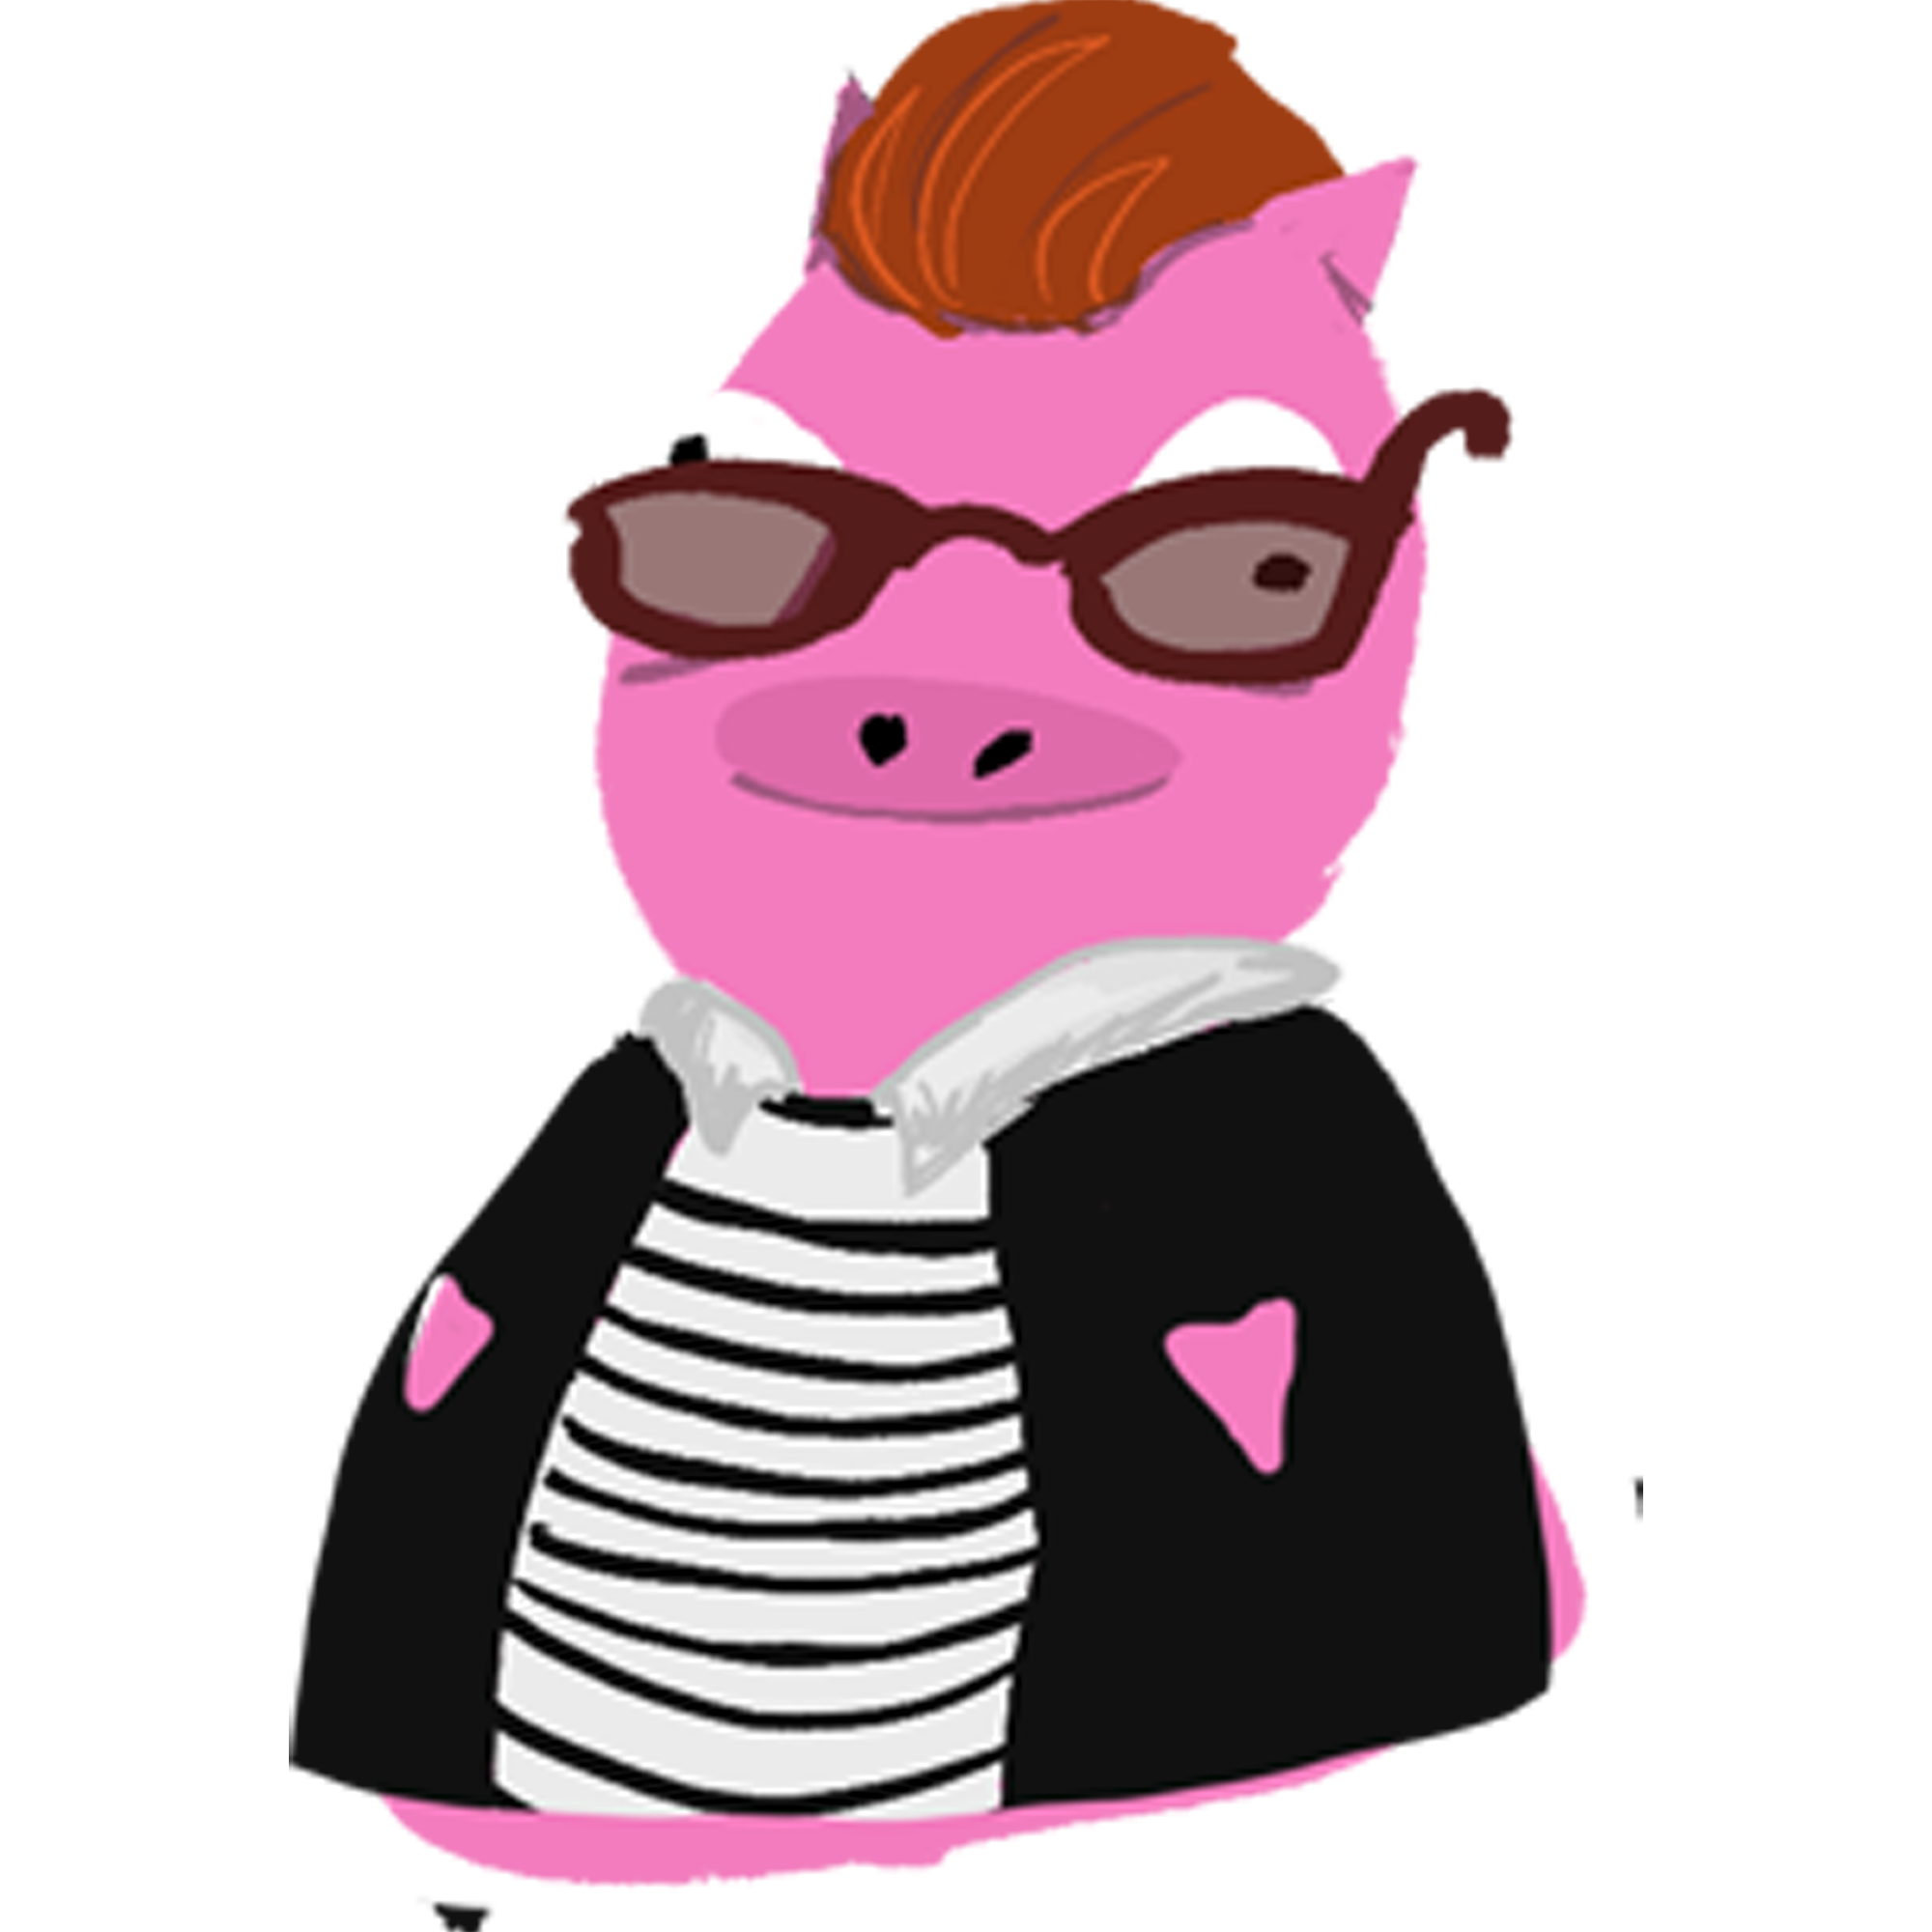

Pictures can be hard to handle though, so don't worry too much about that!

If you want to use jupyter notebooks without Google Colab, you can try other virtual environments like [Anaconda](https://www.anaconda.com/products/individual)

And check out some of the basic information over at the Jupyter notebook website: https://jupyter.org/

You can use Jupyter Notebooks for projects of all kinds, but especially collaboration and fun machine learning ideas!

# Needed Libraries
So we're programming in Python, which is great because that's what this notebook is for.  In order to start, let's get all of our libraries.

For this project we'll need:


*   Requests
*   SSL
* LXML
* Beautiful Soup
* NLTK

The following code block (which you can add to a notebook by pressing the '+ Code' option above) will be for installing libraries we may not have in our notebooks already.



In [1]:
# Here is how we make comments in the code blocks!

# Libraries

!pip install requests
!pip install ssl
!pip install lxml
!pip install bs4
!pip install nltk

ERROR: Could not find a version that satisfies the requirement ssl (from versions: 1.15, 1.16)
ERROR: No matching distribution found for ssl


Now we're going to create a spider to pull some information from a given website (that you get to give!) in order to fill in our madlib later!

This spider is going to reach out to the given URL and make sure the website is live / real.  If it isn't, we'll throw an error!  If it is, we will sneakily grab all it's text and store that for later.

Read the notes in the code block for more information if you review later!

In [5]:
"""
This is how you do a block of comments rather than a single line!

This code block is for all of the libraries well be using in this whole workshop.
Some perfer to put the libraries right before they're called.

Where you put them is a personal preference in this case.
"""

import sys
import requests, ssl
from lxml import html, etree
from bs4 import BeautifulSoup as bs4
import nltk
from nltk.tokenize import word_tokenize, PunktSentenceTokenizer, sent_tokenize
from nltk import pos_tag
from random import *

In [6]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [7]:
"""
You can break up code into different sections with the code blocks.
Just know that all of these code blocks will execute in order of the blocks
themselves.
"""

# Connecting to the network -- I.E. setting up the request system for the URL
connecting = requests.session()

In [9]:
# A wrapper for socket objects.
# NOTE: SSL == Secure Sockets Layer

ssl.create_default_context()
heck_hostname = False
cerify_mode = ssl.CERT_NONE

In [29]:
# It's time to go on our adventure to grab some text!
# This is a defined block that can be called by another function in the code.

def textGrab(url, error_count):
  # Try blocks are important!  We want to ensure viability and help the user.
  try:
    response = connecting.get(url)
  except requests.RequestException:
    # If the URL fails, the user will be requested to input a new one.
    error_count = error_count + 1
    print('Error: This URL is not accessable!')

    # The user will have up to five attempts at a viable URL.  Number is arbitrary.
    if error_count == 5:
      print('Terminating: Too many Failed Attempts')
      sys.exit()
    else:
      userInput(error_count)
      return
    
  # Let's store all the information for the site we reached out to.
  data = response.content

  # So we don't want that.  Let's, instead, clean it up a bit by pulling out the html format.
  pull = html.fromstring(data)

  # And then let's make that html readable to us humans.
  readable = etree.tostring(pull, pretty_print = True, method = "html")
  
  # Time to take out all that unnecessary stuff.  We want plain ol' Text.
  features = bs4(readable, features = "lxml")
  for f in features(["script", "style"]):
    f.decompose()
  
  # So what did that base data look like?  Let's find out.
  #   This code block can be ignored, it is not necessary just for fun.
  #print(data)

  #Now we want to get the text in a the form of lists for the NLP portion
  #   Finally getting close to the machine learning part!
  #   We want the lists to come from the ends of phrases, sentences, or breaks in the original code.
  scraped_text = list(features.stripped_strings)

  #   We're going to join the strings together to get the whole text in one large corpus.
  #     A corpus is a work of text we can evaluate.  We'll play with this later.
  scraped_text = ''.join(scraped_text)

  # Now let's call another module -- the NLP module!
  PartsofSpeech(scraped_text)
  #   Oh wait, we didn't make it yet.  Guess we need to go do that...

# Natural Language Processing

We did it!  We made it to the Machine Learning part of the workshop.  Phew.  That took a while, but spiders are fun so hopefully this has been an interesting adventure.

This section of the notebook is going to focus on setting up our NLP portion of the madlib spider.  First we need to learn about Natural Language Processing though!  Learn more about that here in these tutorials: [Click Me!](https://colab.research.google.com/drive/16_m1Jffvq3QUkS8eYjxLb6cs1Z3eDgum?usp=sharing
)

In [31]:
"""
The following are parts of speech that we care about for the madlib, keep 
these in mind for the parsing we'll be doing in this module.

    Parts of Speech to Tag:
        JJ      -- Adjective
        JJR     -- Adjective, Compariative
        JJS     -- Adjective, superlative
        NN      -- Noun, singular
        NNS     -- Noun plural
        NNP     -- Proper Noun, Singular
        NNPS    -- Proper Noun, Plural
        RB      -- Adverb 
        RBR     -- Comparitive
        RBS     -- Adverb Superlative
        VB      -- Verb
        VBD     -- Verb, past tense
        VBG     -- Verb, present particle
        VBN     -- Verb, past particle
        VBP     -- Verb, singular present
        VBZ     -- Verb, person singular, present.

The different lists of words pulled from the scraped text will be pushed to the
madlib module (we'll be making that next!")
"""
def PartsofSpeech(corpus):
    print("Got it!")
    
    NounList = ['NN', 'NNS', 'NNP', 'NNPS']
    VerbList = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    ADJList = ['JJ', 'JJR', 'JJS']
    ADVList = ['RB', 'RBR', 'RBS']
    NN = []
    VB = []
    ADJ = []
    ADV = []
    
    
    token = sent_tokenize(corpus)
    try:
        for i in token:
            words = word_tokenize(i)
            
            for tag in pos_tag(words):
                if tag[1] in NounList:
                    NN.append(tag[0])
                elif tag[1] in VerbList:
                    VB.append(tag[0])
                elif tag[1] in ADJList:
                    ADJ.append(tag[0])
                elif tag[1] in ADVList:
                    ADV.append(tag[0])
        
    except Exception as e:
        print(str(e))
    
    #wordChoice(NN)
    MadlibMenu(NN, ADJ, ADV, VB)

In [13]:
"""
This next section will hold the madlibs that we'll be working with.
Some of these aren't complete, so you can finish them as an exercise!

There are a few functions which will work to pull a word out of the parts of 
  speech lists we made in the PartsofSpeech module at random to fill in our madlib
  as necessary.

Madlibs for testing brought to us by Google and:
    https://www.it.iitb.ac.in/~vijaya/ssrvm/worksheetscd/getWorksheets.com/Language%20Arts/madlibsdoc.pdf
"""

def wordChoice(PoS_List):
    
    r = randint(1, len(PoS_List))
    word = PoS_List[r]
    #print(r, word)
    
    return word

In [14]:
def MonkeyKing(NN, ADJ, ADV, VB):
    
    print("This Madlib is called: 'The Monkey King!'\n")
    
    verb = wordChoice(VB)
    noun = wordChoice(NN)
    adjective = wordChoice(ADJ)
    adverb = wordChoice(ADV)
    
    print("The day I saw the Monkey King ", verb, " was one of the most " \
          "interesting days of the year.  After he did that, the king played " \
              "chess on his brother's ", noun, " and then combed his ", adjective, 
              "hair with a comb made out of old fish bones.  Later that same " \
                  "day, I saw the Monkey King dance ", adverb, "in front of " \
                      "an audience of kangaroos and wombats.")

In [15]:
def DisneyTrip(NN, ADJ, VB):
    
    Vehicles = [
        "Suspension Railway",
        "Coco Taxi",
        "Monte Toboggan",
        "Bamboo Train",
        "Maglev",
        "DUKW",
        "Dog Sleds",
        "Gondola",
        "Barco de Totora",
        "Underground Funicular",
        "Reindeer Sled",
        "Felucca Boats"
        ]
    Disney = [
        "Darla",
        "Sully",
        "Mary Poppins",
        "Elsa",
        "Anna",
        "Minnie Mouse",
        "Tinker Bell",
        "Fawn",
        "the Incredibles",
        "Lilo",
        "Stitch",
        "Woody",
        "Buzz Lightyear",
        "Lizzie",
        "Nemo",
        "Dory",
        "Marlin",
        "Kuzco",
        "Alice"
        "Mad Hatter",
        "Big Hero 6",
        "Powerline",
        "Dalmations",
        "Oozma Kappa Fraternity",
        "the Muses",
        "Aliens",
        "Hannah Montana",
        "Proto Zoa",
        "Belle",
        "the Cheetah Girls",
        "Maleficent",
        "Penny Proud"
        ]
    verb = []
    noun = []
    adjective = []
    
    friend = str(input("What is a friend's name for the story?"))
    n = randint(1, 100000)
    vehicle = wordChoice(Vehicles)
    disney = wordChoice(Disney)
    i = 0
    while(i < 6):
        v = wordChoice(VB)
        verb.append(v)
        i += 1
    i = 0
    while(i < 3):
        n = wordChoice(NN)
        noun.append(n)
        i += 1
    i = 0
    while(i < 5):
        adj = wordChoice(ADJ)
        adjective.append(adj)
        i += 1
    
    print("Last month, I went to Disney World with ", friend, ". We traveled " \
          "for ", n, " by ", vehicle, ". Finally, we arrived and it was very ",
          adjective[1], ".  There were also people dressed up in ", disney, 
          "costumes. \n\n I wish it had been more ", adjective[2], ", but we ", 
          verb[1], " anyway.  We also went on a(n)", adjective[3],
          " ride called Magic ", noun[1], ". ", friend, " nearly fell off a ride" \
              " and had to be ", verb[2], ".  Later, we went to the hotel and ",
              verb[3], ".  Next year, I want to go to (the)", noun, " where we can",
              verb[4], ".")

In [16]:
def GreatToy(NN, ADJ, ADV, VB):
    """There is a new toy on the market that has everyone saying 
    ____________(exclamation)! It is called the ____________(sound) 
    ____________(adjective) ____________(noun) box, and will be in stores in 
    ____________(a month). The ____________(sound)  ____________(adjective) 
    ____________(noun) box is a new gadget that  lets you do just about 
    anything! It ____________(verb)s, it ____________(verb)s, and it even 
    serves ____________(a beverage)! It is easy to operate and requires no 
    instructions!  You can also have it custom made any size up to 
    ____________(number) inches or a  ____________ (color) to glow in the  
    dark at no extra charge! The original product is pocket-sized and 
    ____________ (color). There are ____________(number) jacks on the  
    product for 6V DC power and for upgrades and add-ons. You can add  
    head-phones, ____________(plural noun) monitors, 
    ____________(plural  noun), and more! It’s possible to use them all at the 
    same time! """

In [17]:
def BigMacWho(NN, ADJ, ADV, VB):
    """Big Mc_______________(a last name) had a _______________(noun), 
    ____(a letter)- ______(3 letter noun), ____(a letter)- _____(3 letter noun) 
    O. On this _______________(noun) he had some _______________(plural  noun),
    ____(a letter) -3 ________(3 letter noun),____(a letter)-________(3 letter 
    noun) O. With a __________(type of sound)-__________(type of sound) here, 
    and a __________(type of sound)-__________(type of sound) there, everywhere 
    a __________(type of sound)-__________(type of sound)  
    ____(a letter)-  ________(3 letter noun), 
    ____(a letter)-________(3 letter noun) O."""

In [18]:
def VideoGame(NN, ADJ, ADV, VB):
    """I,  the _______________(adjective) and __________(adjective)
    _______________(a first name) has _______________(past tense verb) 
    _______________(a first name)'s _______________(adjective)  
    sister and plans to steal her _______________(adjective) 
    _______________(plural noun)! What are a ________(large  animal) 
    and backpacking __________(small animal) to do?  
    Before you can help _______________(a girl's name),  
    you'll have to collect the ___________(adjective)  
    _______________(plural noun) and _____________(adjective)  
    _______________(plural noun) that open up the  _______________(number 1-50)
    worlds connected to a _______________(first name's) lair. 
    There are _______________(number) _______________(plural noun) 
    and  _______________(number) _______________(plural noun) in the game, 
    along with hundreds of other goodies for you to find"""

In [19]:
def Jungle(NN, ADJ, ADV, VB):
    """I walk through the color jungle. I take out my _______________(adjective)
    canteen. There's a ________(adjective) parrot with a ______________(adjective)
    _______________(noun) in his mouth right there in front of me in the 
    _________(adjective) trees! I gaze at his __________(adjective) 
    _______________(noun). A sudden sound awakes me from my daydream! 
    A panther’s _______________(verb) in front of my head! I 
    _______________(verb) his _______________(adjective)breath. 
    I remember I have a packet of _________(noun)that makes go into a deep 
    slumber! I __________(verb)it away from me in front of the 
    _______________(noun).Yes he's eating it! I _______________(verb) away 
    through the ____________(adjective) jungle. I meet my parents at the tent. 
    Phew! It’s been an exciting day in the jungle."""

In [20]:
def FirstDaySchool(NN, ADJ, ADV, VB):
    """One very nice morning near the end of summer, my mother woke me up at 
    4:00 A.M. and said, "Wake up and smell the grass, sleepy head! Today is 
    your first day of school and you can't be late." I groaned in my bed for 
    twenty seconds, but eventually I got dressed. I wore a blue and white 
    striped, long sleeve _______________(noun) with a collar on it, a red tie, 
    dark gray pants, white socks, black shoes, and a(n) 
    _______________(adjective) hat. In ten minutes I made lunch and ate my 
    breakfast. _______________(number)minutes later, the bus came. A few 
    minutes later, I was at school.  In school, I met two really 
    _______________(adjective) kids. All of us became friends very fast. That 
    day we had Science, and luckily my friends and I were at the same 
    _______________(noun) .My friends' names are _______________(proper noun) 
    and _______________(proper noun). In Math we weren't together, and that 
    really bugged me. We learned what _______________(plural noun) were, and 
    when to use them. At snack and recess, we played a game  together. It was 
    extremely fun. At P. E., we were ____________(-ing verb) off of the ropes 
    onto _______________(plural noun). I thought it was a very 
    _______________(adjective) idea. In swimming class, we needed to swim 
    extremely _______________(adverb), or else we would have to swim longer.  
    Before I knew it, school was over. I grabbed all my belongings and put 
    them into my backpack. In two minutes, the bus came. As I stepped into the 
    bus I shouted, "Goodbye, adios amigos, and shalom," to my friends. Then I 
    went into the bus. In a flash, I was back home. This day was an extremely 
    exciting day!"""   

In [21]:
def Arcade(NN, ADJ, ADV, VB):
    """When I go to the arcade with my ____________ (plural noun) there are 
    lots of games to play. I spend lots of time there with my friends. In the 
    game X-Men you can be different ____________ (plural noun). The point of 
    the game is to ____________(verb) every robot. You also need to save people. 
    Then you can go to the next level.  In the game Star Wars you are Luke 
    Skywalker and you try to destroy every ____________(noun). In a car 
    racing/motorcycle racing game you need to beat every computerized vehicle 
    that you are ____________ (-ing verb) against.  There are a whole lot of 
    other cool games. When you play some games you win 
    ____________ (plural noun) for certain scores. Once you're done you can 
    cash in your tickets to get a big ______(noun). You can save your 
    ____________ (plural noun) for another time. When I went to this arcade I 
    didn't believe how much fun it would be. So far I have had a lot of fun 
    every time I've been to this great arcade!"""

In [22]:
def FunPark(NN, ADJ, ADV, VB):
    """Today, my fabulous  camp group went to a (an) ____________ (adjective) 
    amusement park. It was a fun park with lots of cool 
    ____________ (plural noun) and enjoyable play structures. When we got 
    there, my kind counselor shouted loudly, "Everybody off the 
    ____________ (noun)." We all pushed out in a terrible hurry. My counselor 
    handed out yellow tickets, and we scurried in. I was so excited! I couldn't
    figure out what exciting thing to do first. I saw a scary roller coaster I 
    really liked so, I ____________ (adverb) ran over to get in the long line 
    that had about ____________ (number) people in it. When I finally got on 
    the roller coaster I was ____________ (past tense verb). In fact I was so 
    nervous my two knees were knocking together. This was the 
    ____________ (-est adjective) ride I had ever been on! In about two minutes
    I heard the crank and grinding of the gears. That’s when the ride began! 
    When I got to the bottom, I was a little ____________ (past tense verb) 
    but I was proud of myself. The rest of the day went ____________ (adverb). 
    It was a(n) ____________ (adjective) day at the fun park."""

In [23]:
def Zoo(NN, ADJ, ADV, VB):
    """Today I went to the zoo. I saw a(n) ___________(adjective)
    _____________(Noun) jumping up and down in its tree.  He 
    _____________(verb, past tense) __________(adverb)through the large tunnel 
    that led to its _______(adjective) __________(noun). I got some peanuts 
    and passed  them through the cage to a gigantic gray _______(noun)towering 
    above my head. Feeding that animal made  me hungry. I went to get a 
    __________(adjective) scoop  of ice cream. It filled my stomach. Afterwards
    I had to __________(verb) __________ (adverb) to catch our bus.  When I got
    home I __________(verb, past tense)my  mom for a __________(adjective) day 
    at the zoo."""

In [24]:
def MadlibMenu(NN, ADJ, ADV, VB):
    print("Welcome to the Madlib Menu!  Please select Madlib " \
          "you want to fill out: \n" \
              "\t1 -- Monkey King\n" \
                  "\t2 -- My Trip to Disney World!\n" \
                      "\t3 -- The Great New Toy!\n" \
                          "\t4 -- Big Mac Who?\n" \
                              "\t5 -- Make me a Video Game!\n" \
                                  "\t6 -- In the Jungle!\n" \
                                      "\t7 -- The First Day of School\n" \
                                          "\t8 -- At the Arcade\n" \
                                              "\t9 -- The Fun Park!\n" \
                                                  "\t10 -- A Day at the Zoo!\n")
    
    choice = int(input("Input the numeric value for your choice: "))
    
    if (choice == 1): MonkeyKing(NN, ADJ, ADV, VB)
    elif(choice == 2): DisneyTrip(NN, ADJ, VB)
    elif(choice == 3): GreatToy(NN, ADJ, ADV, VB)
    elif(choice == 4): BigMacWho(NN, ADJ, ADV, VB)
    elif(choice == 5): VideoGame(NN, ADJ, ADV, VB)
    elif(choice == 6): Jungle(NN, ADJ, ADV, VB)
    elif(choice == 7): FirstDaySchool(NN, ADJ, ADV, VB)
    elif(choice == 8): Arcade(NN, ADJ, ADV, VB)
    elif(choice == 9): FunPark(NN, ADJ, ADV, VB)
    elif(choice == 10): Zoo(NN, ADJ, ADV, VB)
    else:
        print("ERROR: Invalid Input")
        MadlibMenu(NN, ADJ, ADV, VB)

In [27]:
#   This function is to help make sure the user is inputting a valid URL;
#       called by the try-block in roadtrip() if necessary.
def userInput(error_count):
    url = str(input("Please supply a URL for the spider: ... \n"))
    textGrab(url, error_count)

In [32]:
if __name__ == '__main__':
    error_count = 0
    userInput(error_count)
    
    #   Closing statement to make sure we're hitting the end of the program.
    print("\n\n\tTime for the spider to take a nap...")
    sys.exit()

Please supply a URL for the spider: ... 
https://en.wikipedia.org/wiki/Shrek
Got it!
Welcome to the Madlib Menu!  Please select Madlib you want to fill out: 
	1 -- Monkey King
	2 -- My Trip to Disney World!
	3 -- The Great New Toy!
	4 -- Big Mac Who?
	5 -- Make me a Video Game!
	6 -- In the Jungle!
	7 -- The First Day of School
	8 -- At the Arcade
	9 -- The Fun Park!
	10 -- A Day at the Zoo!

Input the numeric value for your choice: 1
This Madlib is called: 'The Monkey King!'

The day I saw the Monkey King  compose  was one of the most interesting days of the year.  After he did that, the king played chess on his brother's  FilmThe  and then combed his  RetrievedJanuary hair with a comb made out of old fish bones.  Later that same day, I saw the Monkey King dance  vocally in front of an audience of kangaroos and wombats.


	Time for the spider to take a nap...


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
